In [1]:
from matplotlib import pyplot as plt
import numpy as np


In [2]:
def plot_trace_sigma(sigmas, energy_grid, plot_params=None, ax=None):
    trace_sigma = np.trace(sigmas, axis1=1, axis2=2)
    if plot_params is None:
        plot_params = {}

    if ax is None:
        fig, ax = plt.subplots(figsize=plot_params.get("figsize", (10, 6)))

    ax.plot(energy_grid.real, trace_sigma.real, label="Re(Tr(Σ))", color="blue")
    ax.plot(energy_grid.real, trace_sigma.imag, label="Im(Tr(Σ))", color="red")

    ax.set_xlabel(plot_params.get("xlabel", "Energy (Real part of z_ret)"))
    ax.set_ylabel(plot_params.get("ylabel", "Tr(Σ)"))
    ax.set_title(
        plot_params.get(
            "title", "Real and Imaginary Parts of Tr(Σ) as a Function of Energy"
        )
    )
    ax.legend(loc=plot_params.get("legend_loc", "upper right"))
    ax.set_xlim(plot_params.get("xlim"))
    ax.set_ylim(plot_params.get("ylim"))
    ax.grid(plot_params.get("grid", True))

    if ax is None:
        plt.tight_layout()
        plt.show()


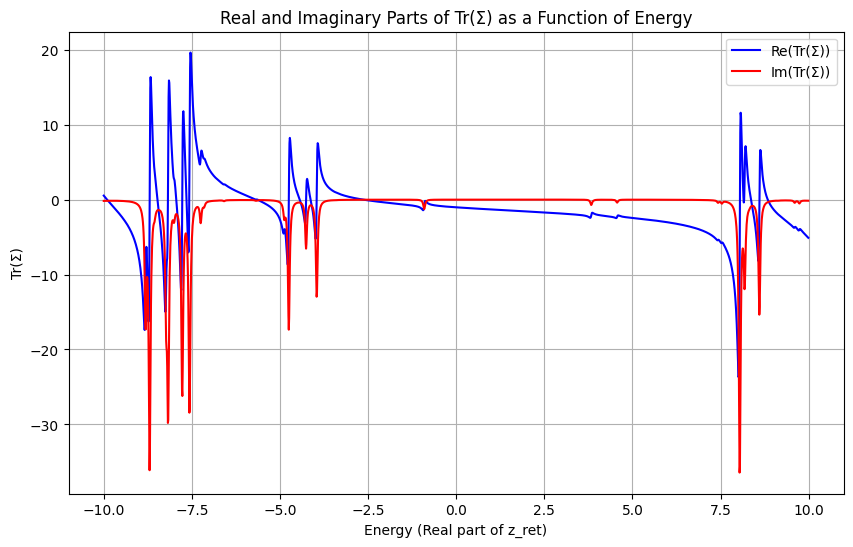

In [3]:
energies = np.arange(-10, 10, 0.01)
eta = 3e-2
z_ret = energies + 1.0j * eta
sigmas = np.load("dmft_sigma.npy")
plot_trace_sigma(sigmas, z_ret)

(-3.0, 3.0)

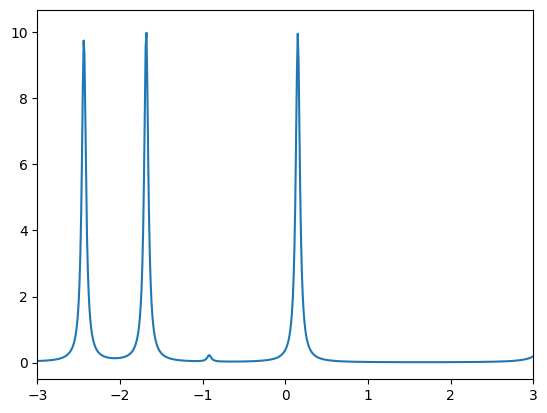

In [4]:
gflocs = np.load("dmft_gfloc.npy")
gflocs_sum = np.sum(gflocs, axis=0)
dos = -1/np.pi * np.imag(gflocs_sum)
plt.plot(energies,dos)
plt.xlim(-3,3)